Importing dependencies...

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt 
import cv2
import tensorflow as tf

C:\Users\karthi\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


creating the class labels and path defining...

In [2]:
os.chdir("dataset path")        #set path
letters_data=os.listdir()  							       #list the files in the directory
classes={'00':0,           							       #defining class for different letters
         '01':1,
         '02':2,
         '03':3,
         '04':4,
         '05':5,
         '06':6, 
         '07':7,
         '08':8,
         '09':9,
         '10':10}

Preprocessing step...

In [3]:
data=[]
for i,each in enumerate(letters_data):
    arr=np.zeros(11)
    image=cv2.imread(each)	                                #reading the file
    image=cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)/255        #converting image to grayscale
    image=cv2.resize(image,(160,160))				        #resize all the image			 
    arr[classes[each[5:7]]]=1                               #one hot encoding
    data.append([np.array(image).reshape(160,160,1),arr])   #saving the image array and its class

Splitting training and testing data... 

In [4]:
x,y=zip(*data)
train_data=test_data=x
train_label=test_label=y
print("preprocess completed...")

preprocess completed...


Visualize the image...

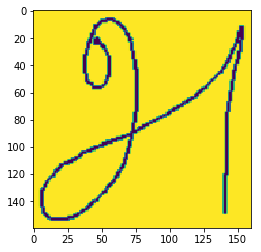

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [5]:
plt.imshow(train_data[5].reshape(160,160))
plt.show()
print(train_label[5])

Defining the convolution neural network model...

In [6]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=5,
          padding='same', activation='relu',input_shape=(160,160,1)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=5, 
          padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=5, 
          padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='sigmoid')) 
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(11, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 160, 160, 32)      832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 80, 80, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 80, 80, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 80, 80, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 40, 40, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 40, 40, 128)       204928    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 20, 20, 128)       0         
__________

defining loss and optimizer functions...

In [7]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',                                     #defining loss function and optimiser function
             metrics=['accuracy'])

Fitting the train and test data...

In [8]:
history= model.fit(np.array(train_data),
         np.array(train_label),
         batch_size=30,                                            #fitting our training and testing data
         epochs=15,
         validation_data=(np.array(test_data), np.array(test_label)))

Train on 110 samples, validate on 110 samples
Epoch 1/15
110/110 [==============================] - 76s 688ms/step - loss: 3.1037 - acc: 0.0818 - val_loss: 2.4946 - val_acc: 0.0909
Epoch 2/15
110/110 [==============================] - 28s 257ms/step - loss: 2.7016 - acc: 0.1000 - val_loss: 2.4224 - val_acc: 0.0909
Epoch 3/15
110/110 [==============================] - 22s 199ms/step - loss: 2.5969 - acc: 0.0909 - val_loss: 2.3812 - val_acc: 0.0909
Epoch 4/15
110/110 [==============================] - 21s 191ms/step - loss: 2.5246 - acc: 0.0727 - val_loss: 2.3192 - val_acc: 0.1182
Epoch 5/15
110/110 [==============================] - 20s 181ms/step - loss: 2.4433 - acc: 0.0727 - val_loss: 2.0830 - val_acc: 0.4000
Epoch 6/15
110/110 [==============================] - 23s 210ms/step - loss: 1.9851 - acc: 0.3273 - val_loss: 1.3081 - val_acc: 0.9182
Epoch 7/15
110/110 [==============================] - 22s 199ms/step - loss: 1.1012 - acc: 0.8000 - val_loss: 0.3651 - val_acc: 0.9636
Epoch 8/1

predicting the character...

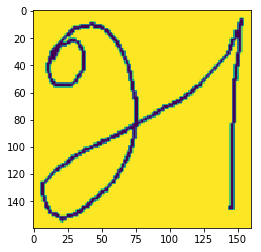

[[9.9529922e-01 5.4905860e-04 1.6585393e-03 3.3967334e-04 2.2201805e-04
  5.6363986e-04 2.2059785e-04 6.9360198e-05 9.4078845e-05 8.4751466e-04
  1.3619794e-04]]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [9]:
plt.imshow(np.array(test_data[0]).reshape(160,160))
plt.show()
print(model.predict(np.array(test_data[0]).reshape(1,160,160,1)))               #predict the class of letter
print(test_label[0])

Plotting the loss...

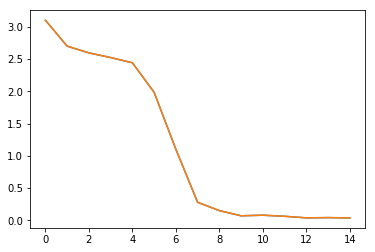

In [12]:
plt.plot(history.history['loss'])
plt.show()

Saving the model

In [ ]:
tf.keras.models.save_model(model,"path to save the model")

Loading the saved model and use it for prediction

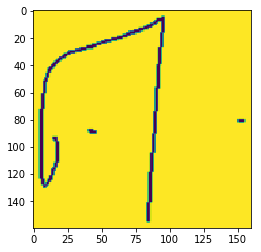

[[7.1037168e-05 2.6901349e-04 6.6586235e-04 9.9787438e-01 2.1716673e-04
  4.0237293e-05 4.8634407e-05 8.3018000e-05 2.5533306e-04 1.4881234e-04
  3.2648904e-04]]


In [17]:
nmodel=tf.keras.models.load_model("path where the model is saved")
plt.imshow(test_data[38].reshape(160,160))
plt.show()
print(nmodel.predict(np.array(test_data[38]).reshape(1,160,160,1)))